# Gradient Boosting

In [26]:
import sys, os
def importOwnLib():
    if '/home/miruware/aProjects/lib' not in sys.path:
        sys.path.append('/home/miruware/aProjects/lib')
        print("lib path is successfully appended.")
    else:
        print("lib path is already exists.")

importOwnLib()

import sonyalib as sonya
import importlib
importlib.reload(sonya)
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV


lib path is already exists.


In [3]:
# fit random seed for reproductivity
seed = 7
np.random.seed(seed)

# Load metadata
file_path_train = './BRC_input_201116_train.xlsx' # train
file_path_test = './BRC_input_201116_test.xlsx' # test
meta_train = sonya.get_normalized_metadata(file_path_train)
meta_test = sonya.get_normalized_metadata(file_path_test)
properties = [
    'sex',
    'age',
    'LR',
    'cT',
    'cN',
    'cAverage',
    'cSD',
    'aAverage',
    'aSD',
    'lMax',
    'homogeneous',
    'hetero',
    'rim',
    'clustered',
    'non-mass',
    'AorCa',
    'LymAo',
    'LymCa'
]

num_properties = len(properties)

X_train = meta_train[properties]
y_train = meta_train['label']
X_test = meta_test[properties]
y_test = meta_test['label']

In [4]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (196, 18)
Training Labels Shape: (196,)
Testing Features Shape: (84, 18)
Testing Labels Shape: (84,)


In [25]:
xgb = GradientBoostingClassifier(random_state=42)

print('Parameters currently in use: \n')
pprint(xgb.get_params())

Parameters currently in use: 

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
grid_search = GradientBoostingClassifier()



Model Report
Accuracy : 0.8469
AUC Score (Train): 0.957009


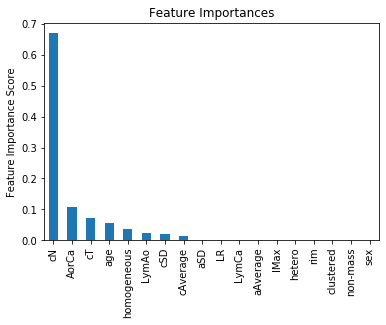

In [24]:
performCV = False
gb_clf = GradientBoostingClassifier(n_estimators=10)
printFeatureImportance = True

#Fit the algorithm on the data
gb_clf.fit(X_train, y_train)
#Predict training set:
pred = gb_clf.predict(X_train)
pred_prob = gb_clf.predict_proba(X_train)[:,1]


# Perform cross-validation:
if performCV:
    cv_score = cross_val_score(gb_clf, X_train, y_train, cv=10, scoring="roc_auc")


#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % accuracy_score(y_train, pred))
print ("AUC Score (Train): %f" % roc_auc_score(y_train, pred_prob))


if performCV:
    print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    
#Print Feature Importance:
if printFeatureImportance:
    feat_imp = pd.Series(gb_clf.feature_importances_, properties).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')